### 1

In [17]:
import numpy as np
from pyquery import PyQuery as pq
from matplotlib import pylab as plt

%matplotlib inline
%config InlineBackend.figure_format = "svg"
%config InlineBackend.close_figures = True

In [18]:
# Загрузка данных
def load_data(data_file: "html", ret_flag: int=0)->tuple:
    """
    Считывание данных из файла, удаление заголовков 
    и разбиение данных на дату и координаты
    """
    text = [item.text() for item in data_file.items("pre")]
    text = text[0].split()
    text = text[3:] # del table 
    del(text[2::3]) # del sigma from data
    
    date = np.array(text[0::2]).astype(float) # convert str to int
    
    data_value = np.array(text[1::2]).astype(float) # convert str value to float
    
    if ret_flag:
        return data_value, date
    return data_value

### Апроксимация с помощью МНК

In [19]:
x_data = pq(filename="data_html/x.html")
y_data = pq(filename="data_html/y.html")

x_coord, date = load_data(x_data, 1)
y_coord = load_data(y_data)

Зададим нобходимые константы

In [20]:
tau_scale = 1 / 365.25
N = 0.85
Vm = 13.25
Vf = 26.73

Зададим матрицу коэф. для аппроксимации $x$

In [21]:
coef_matrix = [[1,
                tau_scale * tau, 
                -np.cos(2 * np.pi * N * tau_scale * tau), 
                np.sin(np.pi * 2 * N * tau_scale * tau), 
                -N * np.cos(2 * np.pi * tau_scale * tau), 
                -np.sin(2 * np.pi * tau_scale * tau)] for tau in date]

МНК

In [22]:
cx0, cx1, axc, axs, dxc, dxs = np.linalg.lstsq(coef_matrix, x_coord, rcond=None)[0]

In [23]:
x_forec = cx0 + cx1 * date * tau_scale \
        - axc * np.cos(2 * np.pi * N * date * tau_scale) \
        + axs * np.sin(np.pi * 2 * N * date * tau_scale) \
        -dxc * N * np.cos(2 * np.pi * date * tau_scale) \
        - dxs * np.sin(2 * np.pi * date * tau_scale)

Зададим матрицу для опредедения $y$


In [24]:
coef_matrix = [[1,
                tau_scale * tau, 
                np.cos(2 * np.pi * N * tau_scale * tau), 
                np.sin(np.pi * 2 * N * tau_scale * tau), 
                -N * np.cos(2 * np.pi * tau_scale * tau), 
                np.sin(2 * np.pi * tau_scale * tau)] for tau in date]

МНК


In [25]:
cy0, cy1, ayc, ays, dyc, dys = np.linalg.lstsq(coef_matrix, y_coord, rcond=None)[0]

In [26]:
y_forec = cy0 + cy1 * date * tau_scale \
        + ayc * np.cos(2 * np.pi * N * date * tau_scale) \
        + ays * np.sin(np.pi * 2 * N * date * tau_scale) \
        - dyc * N * np.cos(2 * np.pi * date * tau_scale) \
        + dys * np.sin(2 * np.pi * date * tau_scale)

### 2

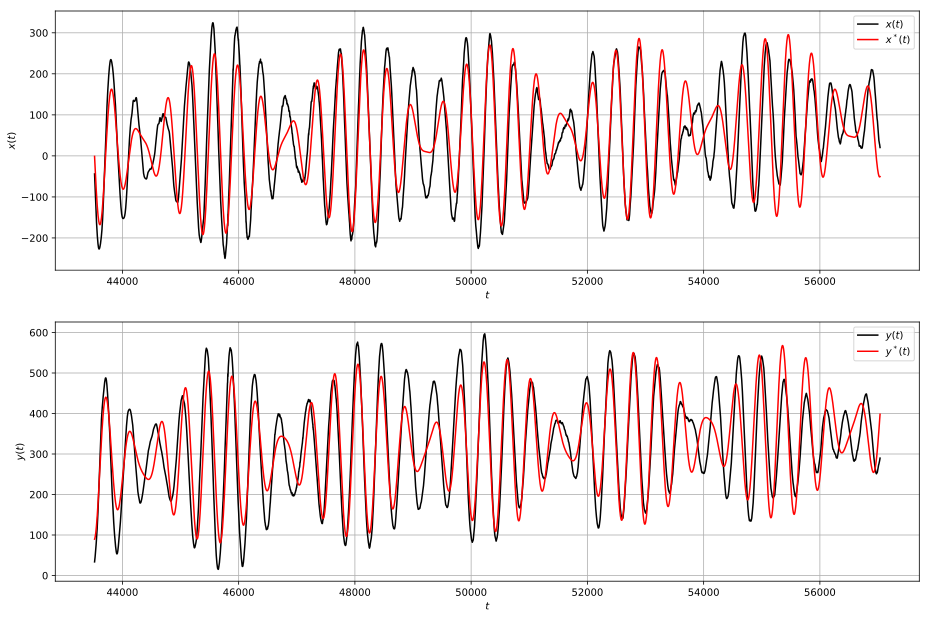

In [36]:
plt.figure(figsize=(15.5, 10.5))
plt.subplot(2,1,1)
plt.grid(True)
plt.ylabel("$x(t)$")
plt.xlabel("$t$")
plt.plot(date, x_coord, color="black", label="$x(t)$")
plt.plot(date, x_forec, c="red", label="$x^*(t)$")
plt.legend()

plt.subplot(2,1,2)
plt.grid(True)
plt.ylabel("$y(t)$")
plt.xlabel("$t$")
plt.plot(date, y_coord, color="black", label="$y(t)$")
plt.plot(date, y_forec, c="red", label="$y^*(t)$")
plt.legend()

plt.savefig("./fig/xyforec.eps", format="eps" ,bbox_inches='tight')
plt.show()